### ADA-II – HW3 - Team 1 - 04/22/2022
Jen Arriaza (Lead) - 65%<br>
Junyu (Eric) Lin - 35%<br>
Byron Liu - 0%<br>
**Algorithms**: Simple Neural Network<br>
**Course**: Applied Data Analytics II, 2022 Spring<br>
**Professor**: Stavros Zervoudakis

#### Problem Statement:

We will attempt to build a predictive classification model for the wine quality scores. Since the dataset is somewhat unbalanced due to over-representation of the middle quality wines and the quality score is discrete, this is a multi-class classification problem that we will attempt to resolve with a simple neural network.

In [2]:
import sys
!{sys.executable} -mpip install pip install tensorflow

     |████████████████████████████████| 217.4 MB 10 kB/s  eta 0:00:012    |███                             | 20.8 MB 11.9 MB/s eta 0:00:17     |██████▊                         | 45.8 MB 9.8 MB/s eta 0:00:18��███▏  | 198.3 MB 11.0 MB/s eta 0:00:02
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl (462 kB)
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached libclang-14.0.1-py2.py3-none-macosx_10_9_x86_64.whl (13.2 MB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
     |████████████████████████████████| 1.6 MB 5.2 MB/s eta 0:00:01
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
     |████████████████████████████████| 4.3 MB 8.3 MB/s eta 0:00:01
   

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# machine learning metrics
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from keras import Sequential

In [2]:
# load dataset
df = pd.read_csv("WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [7]:
df.isna().sum() if (df.isna().sum()).any()>0 else "Data is Clean"

'Data is Clean'

In [8]:
df['quality'].mean()

5.657042869641295

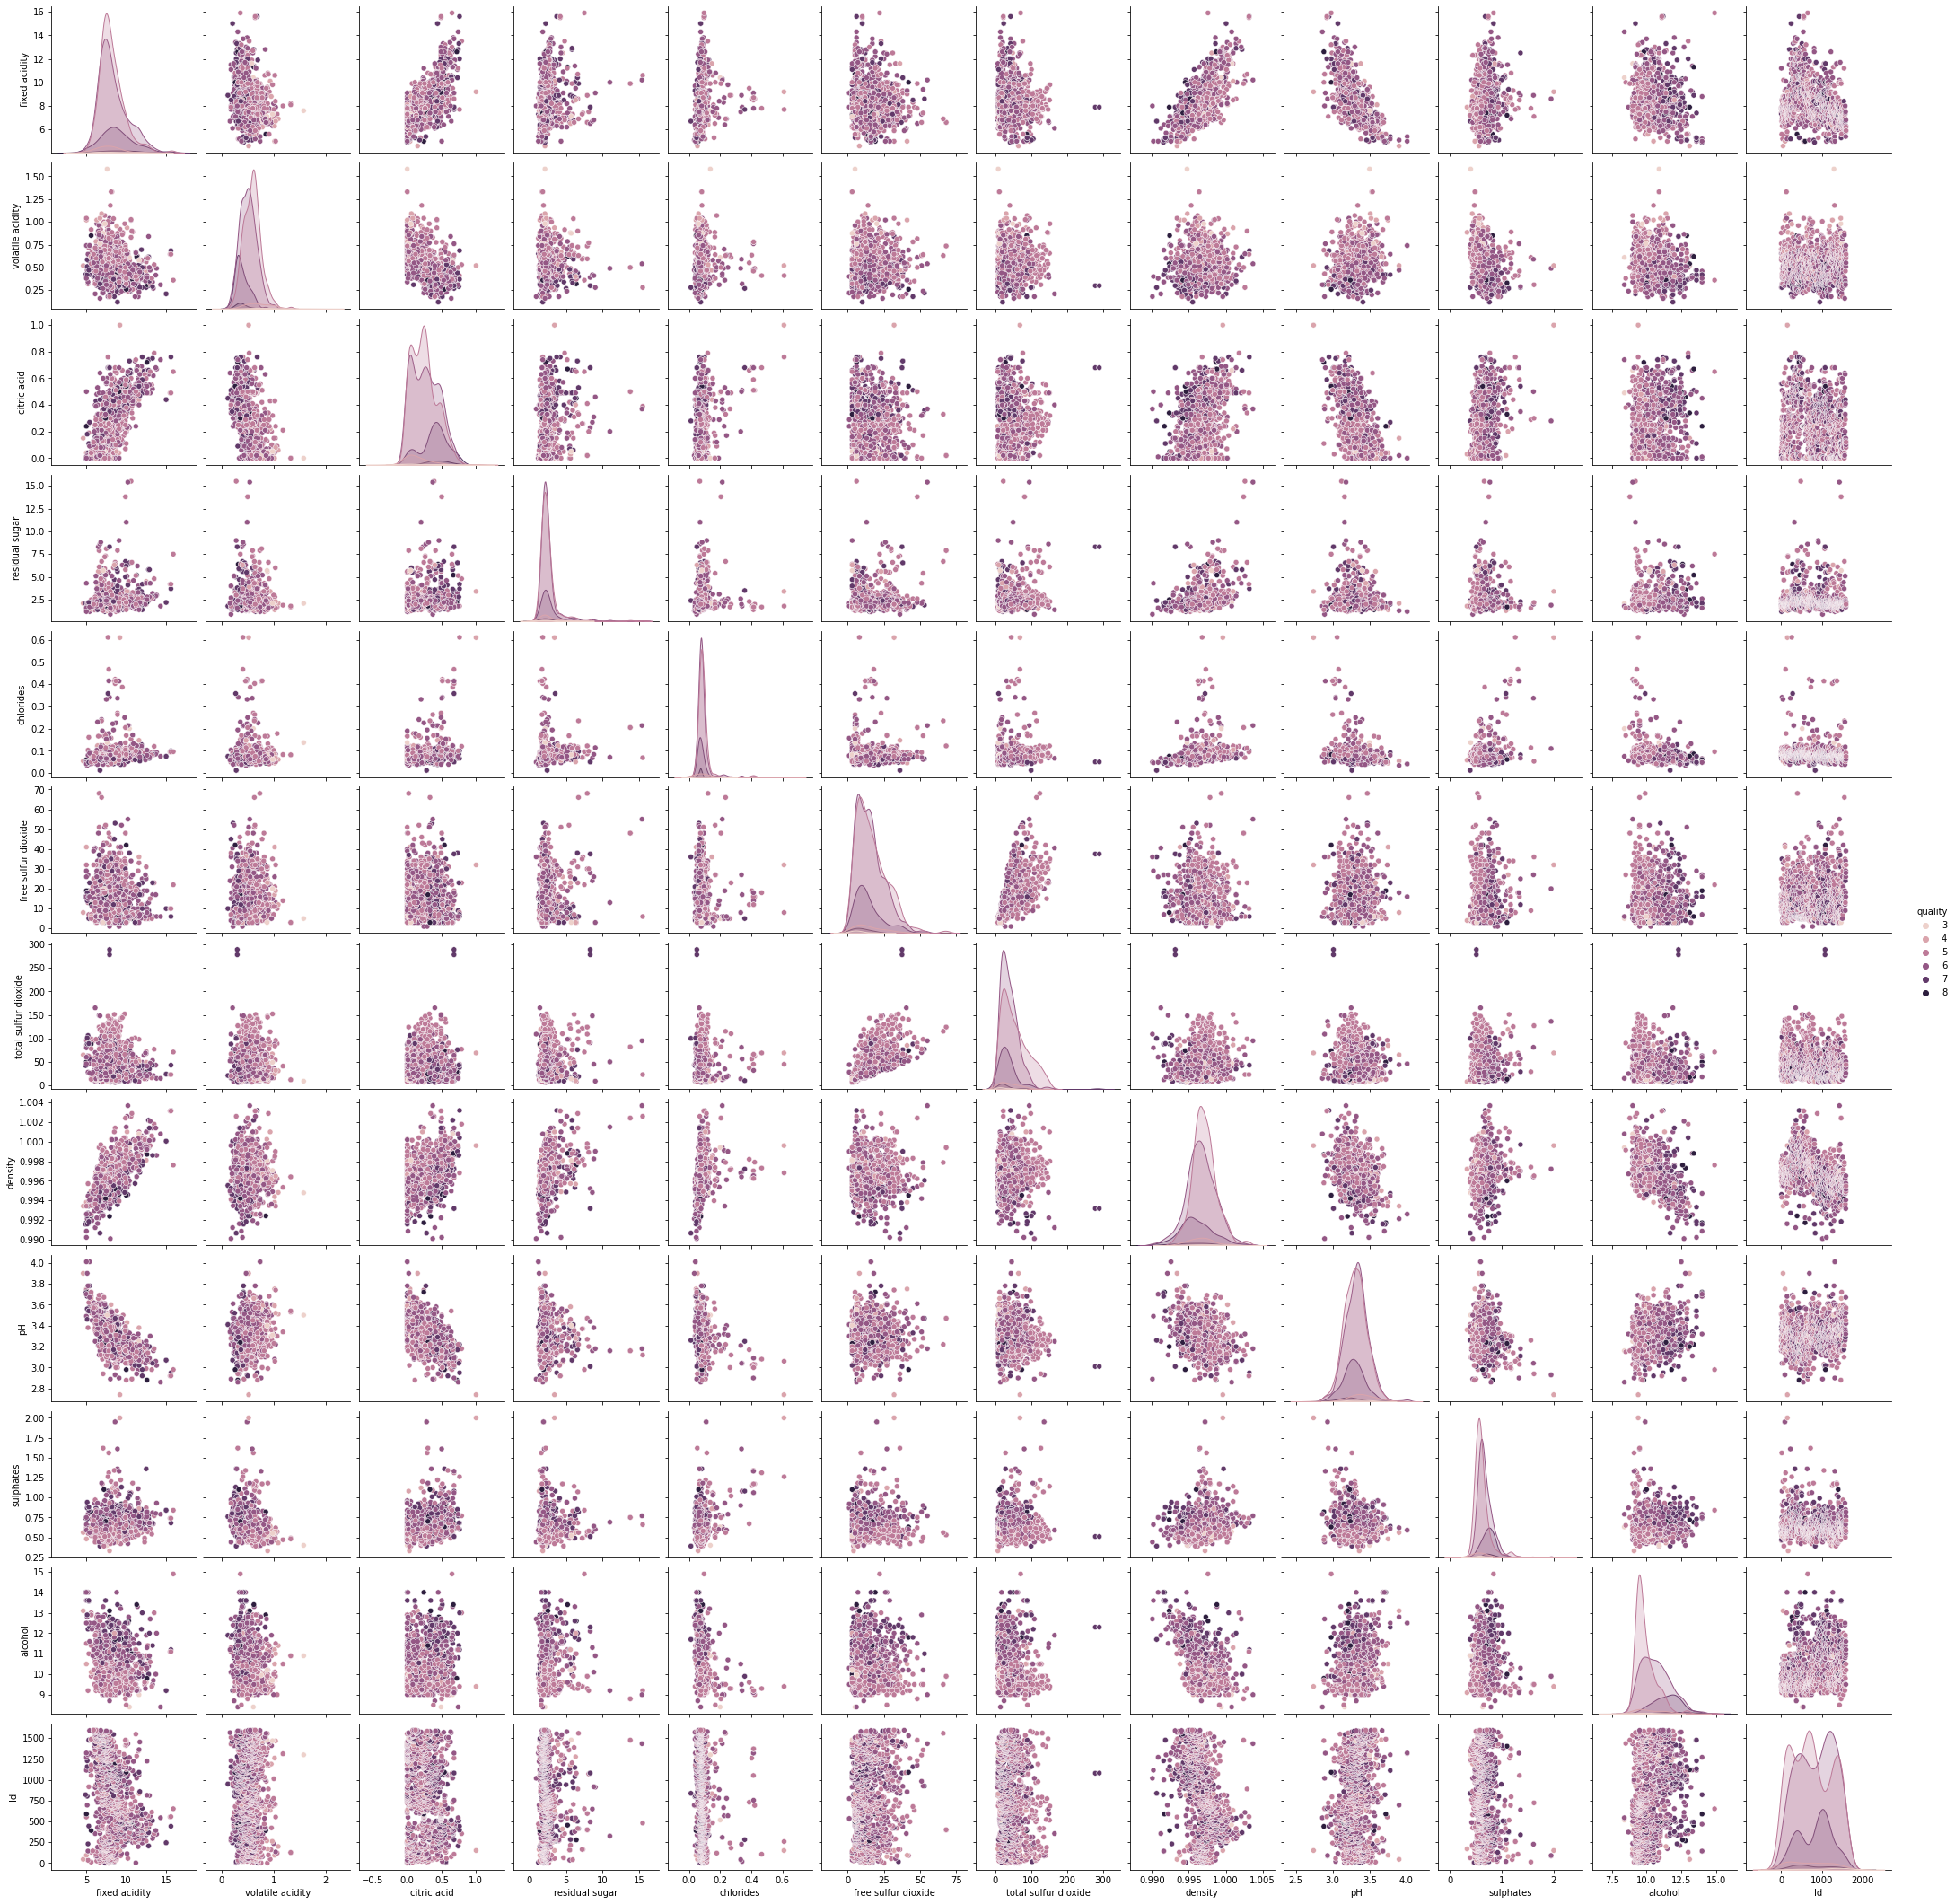

In [20]:
sns.pairplot(data=df,hue='quality')

### Setup train/test dataset

In [3]:
df["quality"] =df["quality"].astype(int)
df = pd.get_dummies(df, columns=["quality"])
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0,0,1,0,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,0,0,1,0,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2,0,0,1,0,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3,0,0,0,1,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,4,0,0,1,0,0,0


In [4]:
from sklearn import preprocessing, model_selection 

X = df.iloc[:,0:11].values # first columns
Y = df.iloc[:,12:].values # last columns

X = preprocessing.normalize(X, axis = 0)

X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.2)

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(914, 11) (914, 6) (229, 11) (229, 6)


In [7]:
from keras import layers, optimizers, regularizers
from keras.layers import Dense, Dropout, BatchNormalization, Activation

wine_model = Sequential()
# layer 1
wine_model.add(Dense(30, input_dim=11, activation='relu', name='fc0',kernel_regularizer=regularizers.l2(0.01)))
wine_model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
#layer 2
wine_model.add(Dense(50, name='fc1',bias_initializer='zeros'))
wine_model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
wine_model.add(Activation('tanh'))
wine_model.add(Dropout(0.5))
#layer 3
wine_model.add(Dense(100, name='fc2',bias_initializer='zeros'))
wine_model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
wine_model.add(Activation('relu'))
wine_model.add(Dropout(0.5))
#layer 4
wine_model.add(Dense(5, name='fc3',bias_initializer='zeros'))
wine_model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
wine_model.add(Activation('softmax'))

In [8]:
wine_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc0 (Dense)                 (None, 30)                360       
                                                                 
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 fc1 (Dense)                 (None, 50)                1550      
                                                                 
 batch_normalization_1 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dropout (Dropout)           (None, 50)                0

In [13]:
Adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
wine_model.compile(optimizer = Adam, loss = "sparse_categorical_crossentropy", metrics = ["categorical_accuracy"])

In [9]:
# Tuning the optimizers

Adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
wine_model.compile(optimizer = Adam, loss = "sparse_categorical_crossentropy", metrics = ["categorical_accuracy"])

/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [14]:
wine_model.fit(x = X_train, y = Y_train, epochs = 200,verbose=1, batch_size = 64,validation_data=(X_test, Y_test))

Epoch 1/200


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
      app.start()
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 612, in start
      self.io_loop.start()
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 741, in _run_callback
      ret = callback()
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2877, in run_cell
      result = self._run_cell(
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2923, in _run_cell
      return runner(coro)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3146, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-14-d99830d0cc8d>", line 1, in <module>
      wine_model.fit(x = X_train, y = Y_train, epochs = 200,verbose=1, batch_size = 64,validation_data=(X_test, Y_test))
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 1862, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/keras/backend.py", line 5202, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [64,5] and labels shape [384]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_2210]

### Feautre Scaling


In [5]:
# Initialize the neural network
ann = tf.keras.models.Sequential()

In [6]:
 # Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [7]:
 # Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [8]:
#Compiling ANN
ann.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['categorical_accuracy'])

In [9]:
#Fitting ANN
ann.fit(X_train,Y_train,batch_size=32,epochs = 100)

Epoch 1/100


ValueError: in user code:

    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/jenarriaza/opt/anaconda3/lib/python3.8/site-packages/keras/backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 6) and (None, 1) are incompatible


In [12]:
#Predicting result for Single Observation
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1,50000]])) > 0.5)

[[ True]]


Epoch 1/1000
2/2 [==============================] - 0s 87ms/step - loss: 0.1689 - val_loss: 0.1685
Epoch 2/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.1683 - val_loss: 0.1672
Epoch 3/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.1675 - val_loss: 0.1674
Epoch 4/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.1673 - val_loss: 0.1675
Epoch 5/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.1674 - val_loss: 0.1670
Epoch 6/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.1671 - val_loss: 0.1673
Epoch 7/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.1671 - val_loss: 0.1671
Epoch 8/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.1671 - val_loss: 0.1670
Epoch 9/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.1670 - val_loss: 0.1671
Epoch 10/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.1670 - val_loss: 0.1670
Epoch 11/

ValueError: y_true and y_pred have different number of output (6!=1)

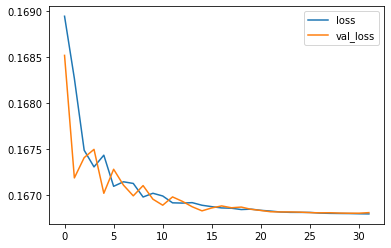

In [15]:
#setting our seed
seed = 1
tf.random.set_seed(seed)

#setting up the keras sequential model
model = keras.Sequential([
    layers.Dense(28, activation='relu', input_shape=[11]),
    layers.Dense(28, activation='relu'),
    layers.Dense(28, activation='relu'),
    layers.Dense(1),
])

#compiling the model perameters
model.compile(
    optimizer='adam',
    loss='mae'
)

#including early stopping to revent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=30,
    min_delta=0.001,
    restore_best_weights=True,
)

#traing the model
history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=1, # hide the output because we have so many epochs
)

#plotting the loss results
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=1)

#making the predictions
dnn_pred = model.predict(X_test)

#getting our results
dnn_mse = mean_squared_error(Y_test,dnn_pred)

#printing rmse
print("MSE =",(round(dnn_mse,2)))

#### Conclusion
- Unfortunately, we encountered several issues retrieving an accuracy score for neural network implementations, however the validation losses indicate that significant parameter tuning or balancing may be needed for optimal performance of a neural network to classify wine quality. 
